In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [2]:
database = IOSystem(year=2022, language="Deutsch").load()

2025-04-22 23:29:42,434 - INFO - Fast database was found - Loading...
2025-04-22 23:29:44,304 - INFO - Database has been loaded successfully in 1.869 seconds.


In [3]:
supplychain = SupplyChain(database=database, Region="Deutschland", Sektor="Textilien")
supplychain

SupplyChain(Number of Indices: 1, Hierarchy levels: {'Kontinent': None, 'Region': 'Deutschland', 'Wirtschaftssektor': None, 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': 'Textilien'})

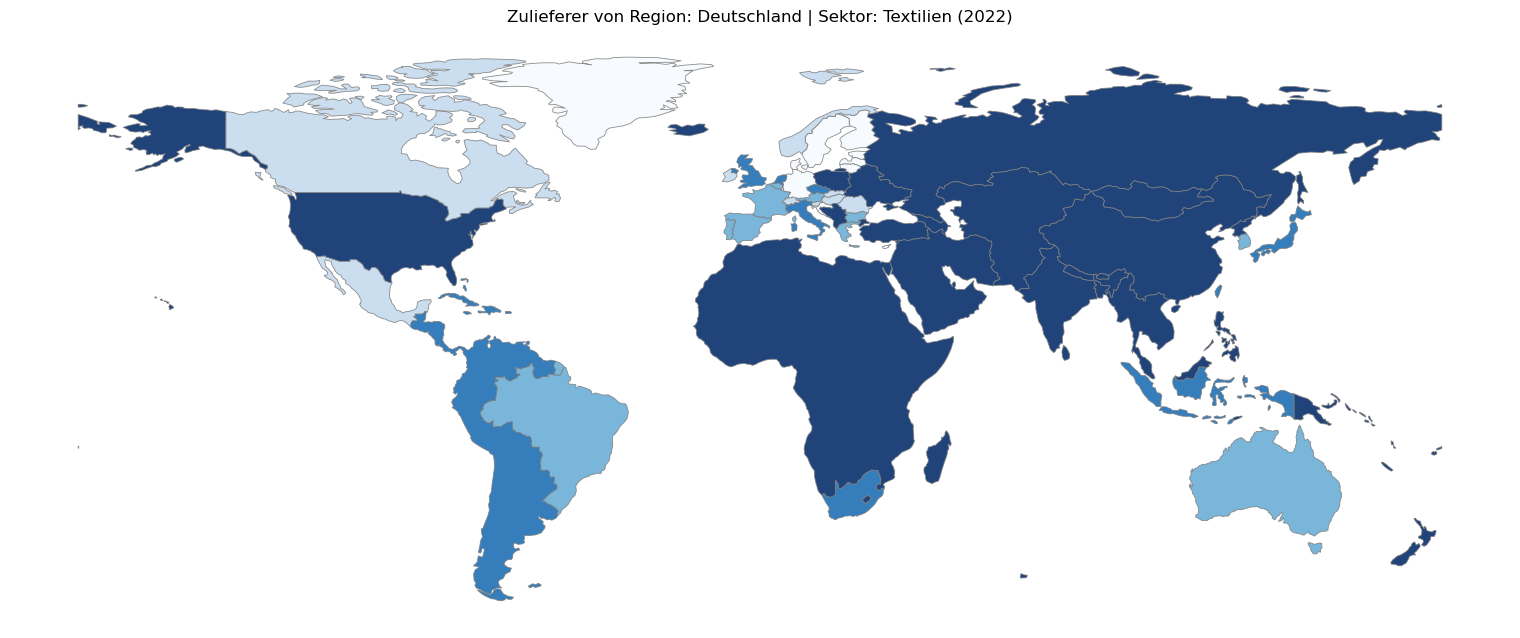

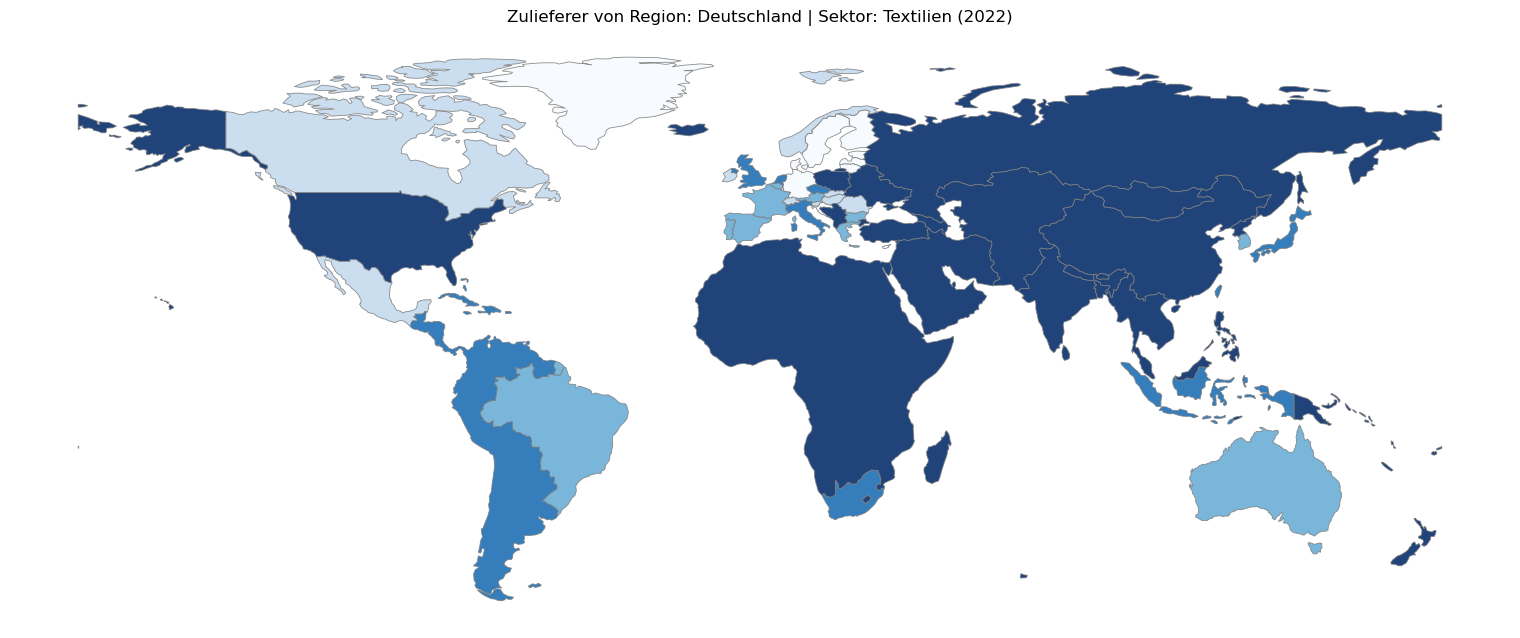

In [5]:
supplychain.plot_regional_impact(impact="Treibhausgasemissionen")

In [6]:
import pandas as pd
pd.DataFrame(supplychain.database.Impact.total.loc["Treibhausgasemissionen"].iloc[:, supplychain.indices].values.tolist(), index=database.regions_exiobase)

,0
AT,6.438939e+07
BE,9.243952e+07
BG,5.456772e+07
CY,7.303238e+05
CZ,2.430745e+08
DE,2.025123e+08
DK,9.218725e+06
EE,1.761343e+07
ES,7.466716e+07
FI,1.388078e+07


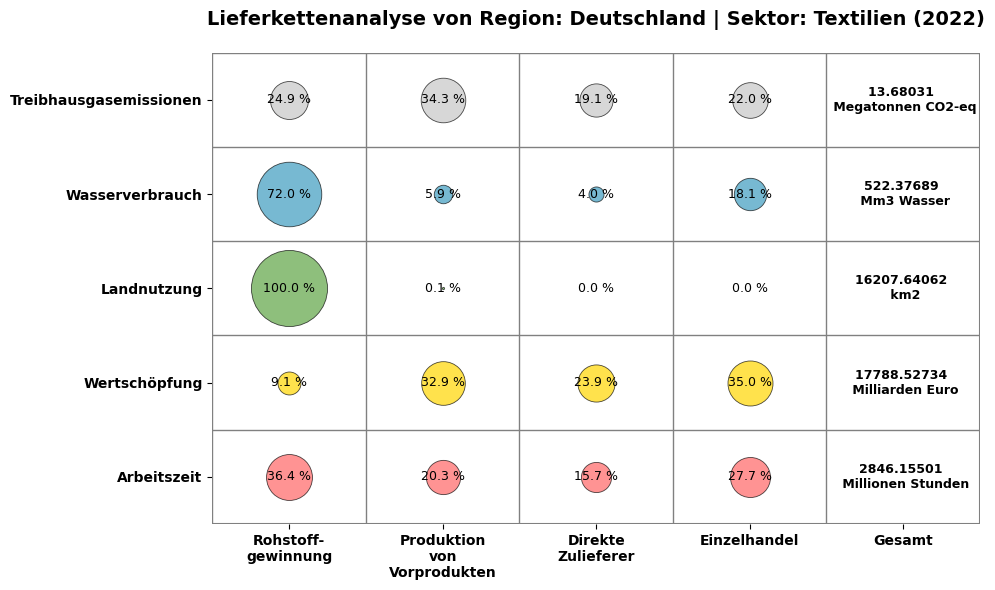

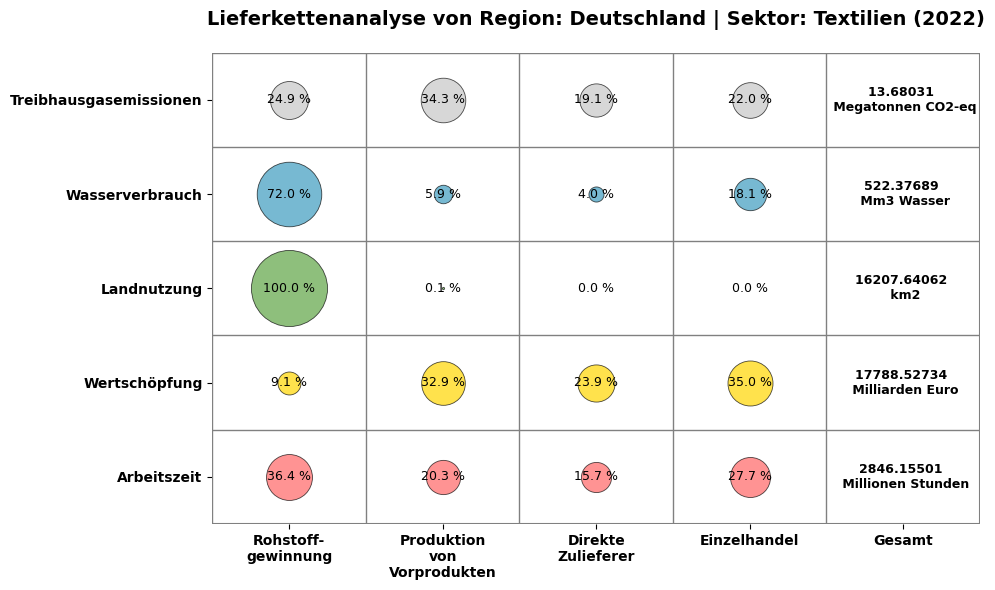

In [10]:
supplychain.plot_supply_chain(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [10]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)

,Rohstoff-\ngewinnung,Produktion\nvon\nVorprodukten,Direkte\nZulieferer,Einzelhandel,Gesamt,Einheit,Farbe
Treibhausgasemissionen,911.39,1010.80,639.80,932.02,3467.00,Megatonnen CO2-eq,#c7c7c6
Wasserverbrauch,45933.28,5840.58,3627.69,4830.00,60118.13,Mm3 Wasser,#3e9cbf
Landnutzung,3519405.00,15589.82,11783.08,0.00,3519405.00,km2,#5ea545
Wertschöpfung,468315.56,1835120.62,1470544.75,2268328.00,5970593.00,Milliarden Euro,#FFD700
Arbeitszeit,105397.53,115255.76,85872.47,145197.92,450302.84,Millionen Stunden,#ff6666


/Users/lukasharzbecker/exiobase_explorer/src/SupplyChain.py:457: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(tick)}%" for tick in cbar.get_ticks()])


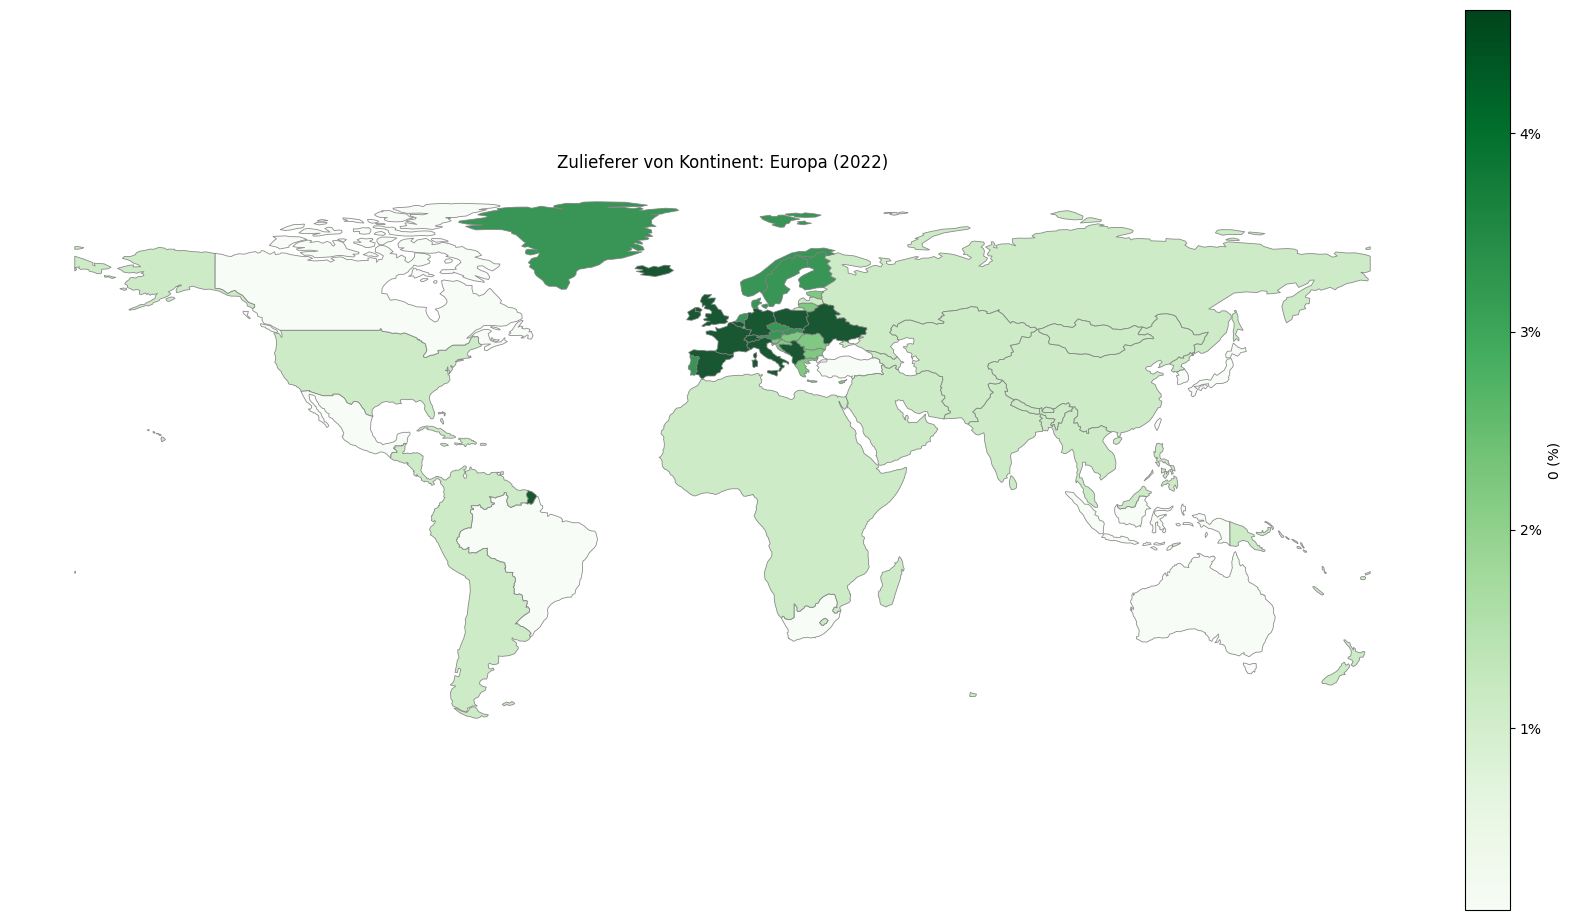

In [6]:
supplychain.plot_subcontractors(color="Greens")